<a href="https://colab.research.google.com/github/zhrnnsw/Machine-Learning/blob/main/Tugas_Praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum Pertemuan 3**
Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


**Catatan Tambahan:**
Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

### **Langkah 1 - Identifikasi Variable Bebas (Fitur)**

Dataset ini berisi informasi biaya medis pribadi pasien, termasuk variabel-variabel berikut:

*   age: Usia pasien.
*   sex: Jenis kelamin pasien (pria/wanita).
*   bmi: Indeks massa tubuh (BMI) pasien.
*   children: Jumlah anak/anak-anak dalam polis asuransi.
*   smoker: Status perokok pasien (ya/tidak).
*   region: Wilayah geografis pasien.
*   charges: Biaya medis pribadi yang dikeluarkan oleh pasien.

Variable Bebas `age`, `bmi`, dan `children`



*   **Age (Usia)**: Usia pasien dapat memiliki pengaruh signifikan terhadap biaya medis. Biasanya, biaya medis cenderung meningkat seiring bertambahnya usia karena risiko penyakit kronis dan perawatan medis yang lebih tinggi pada orang yang lebih tua.
*   **BMI (Indeks Massa Tubuh)**:  BMI tinggi atau rendah dapat mengindikasikan masalah kesehatan, dan ini dapat memengaruhi biaya medis. Orang dengan BMI tinggi cenderung memiliki biaya medis yang lebih tinggi karena masalah kesehatan terkait obesitas.
*   **Children (Jumlah Anak)**: Jumlah anak dalam polis asuransi juga dapat memengaruhi biaya medis pribadi. Pasangan yang memiliki lebih banyak anak mungkin akan membayar biaya medis tambahan untuk anak-anak mereka dalam polis asuransi.



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

### **Langkah 2 - Persiapan Data**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('insurance.csv')

### **Langkah 3 - Pemahaman Terhadap Data**

In [4]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Langkah 4 - Visualisasi Data**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


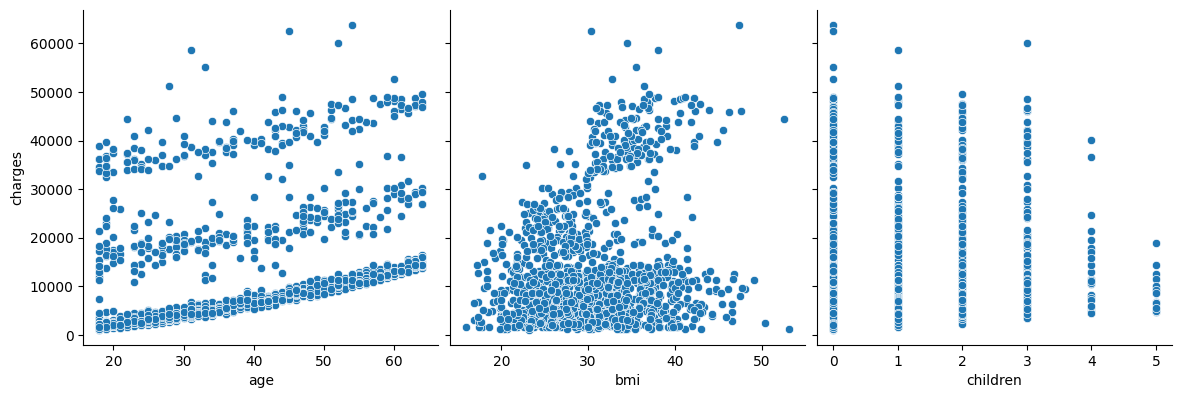

<ipython-input-5-fdd855ff8bb3>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


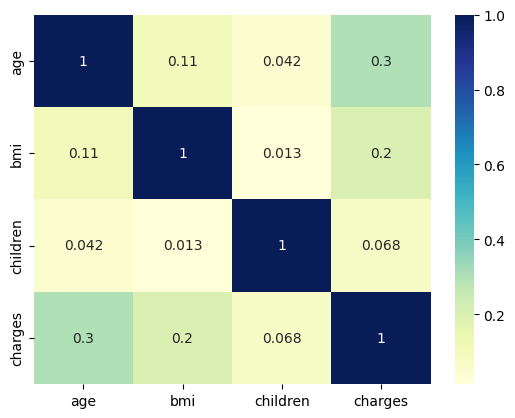

In [5]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### **Langkah 5 - Membuat Model Multiple Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [10]:
# Identifikasi variabel bebas (fitur) dan variabel target
X = data[['age', 'bmi', 'children']]
y = data['charges']

# Bagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (jika diperlukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model MLR
mlr_model = LinearRegression()

# Melatih model pada data latih
mlr_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = mlr_model.predict(X_test_scaled)

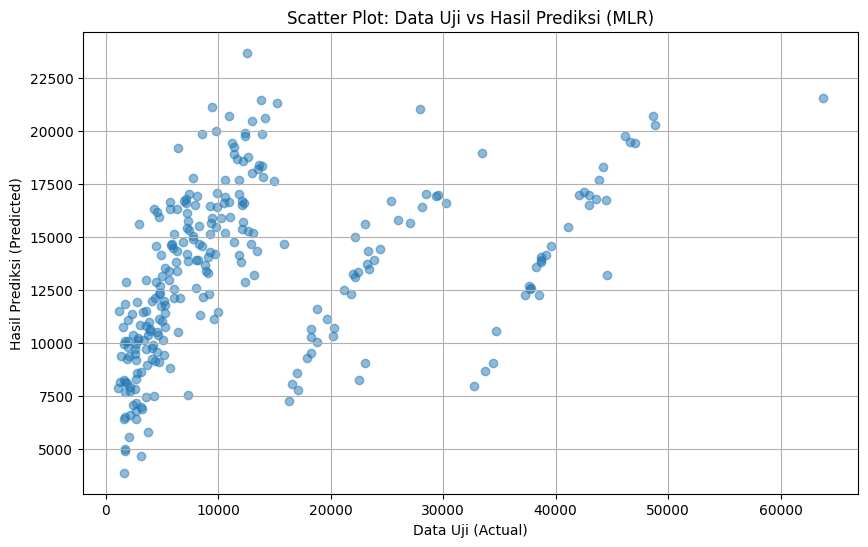

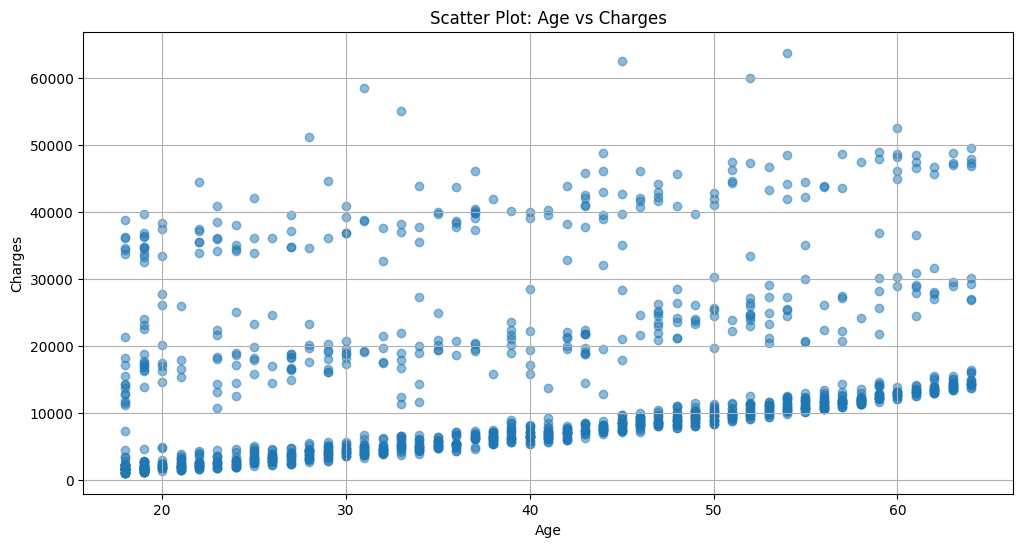

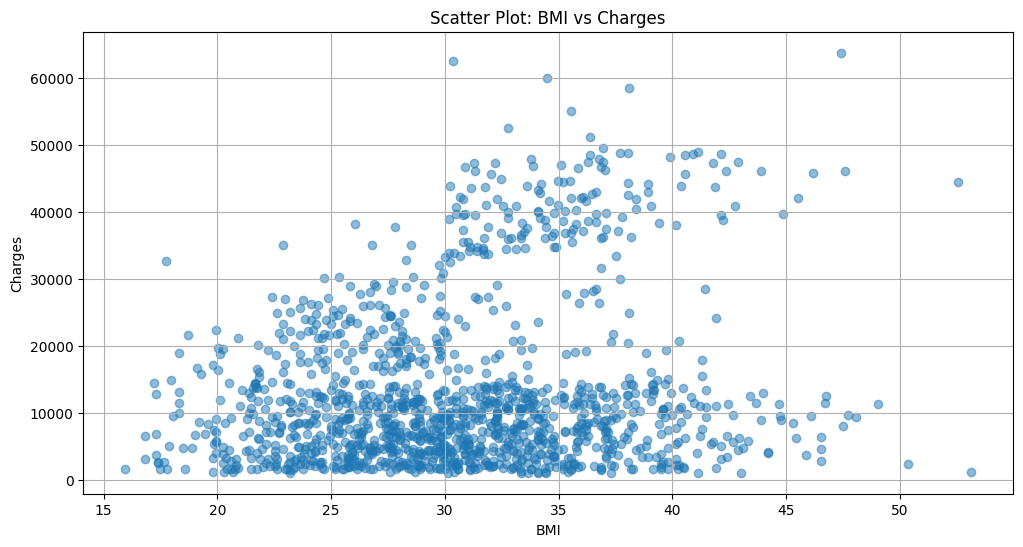

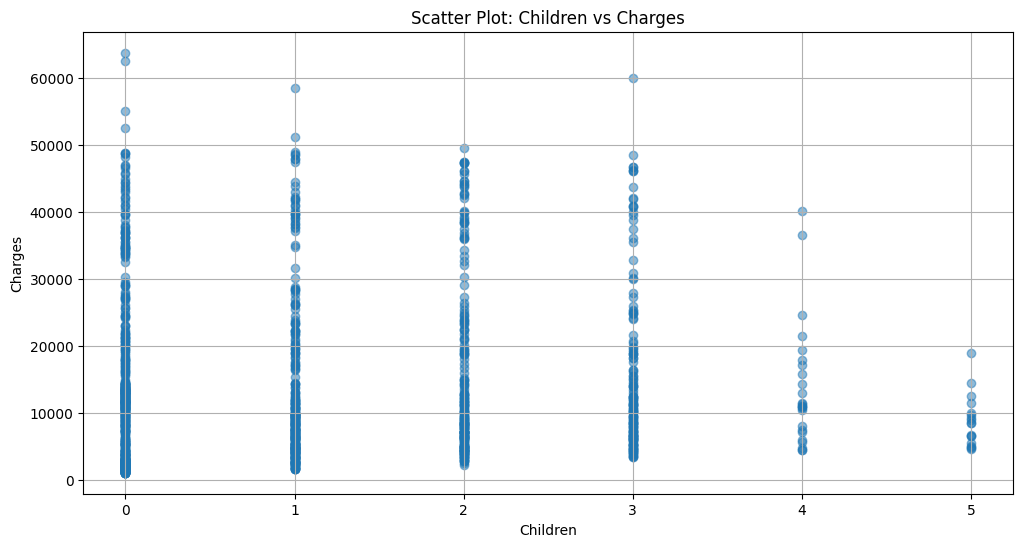

R-squared: 0.15489592484270753
MSE: 131201335.64669806
MAE: 9181.311632897381


In [13]:
# Menghitung R-squared
r_squared = r2_score(y_test, y_pred)

# Menampilkan hasil prediksi dan nilai target
# Scatter plot data uji vs hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot: Data Uji vs Hasil Prediksi (MLR)')
plt.xlabel('Data Uji (Actual)')
plt.ylabel('Hasil Prediksi (Predicted)')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'age' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'bmi' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'children' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['children'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R-squared:", r_squared)
print("MSE:", mse)
print("MAE:", mae)

### **Langkah 7 - Menerapkan Support Vector Regression (SVR)**

R-squared (SVR): -0.07266581556390928
MSE (SVR): 166530007.18088558
MAE (SVR): 8600.875069585998


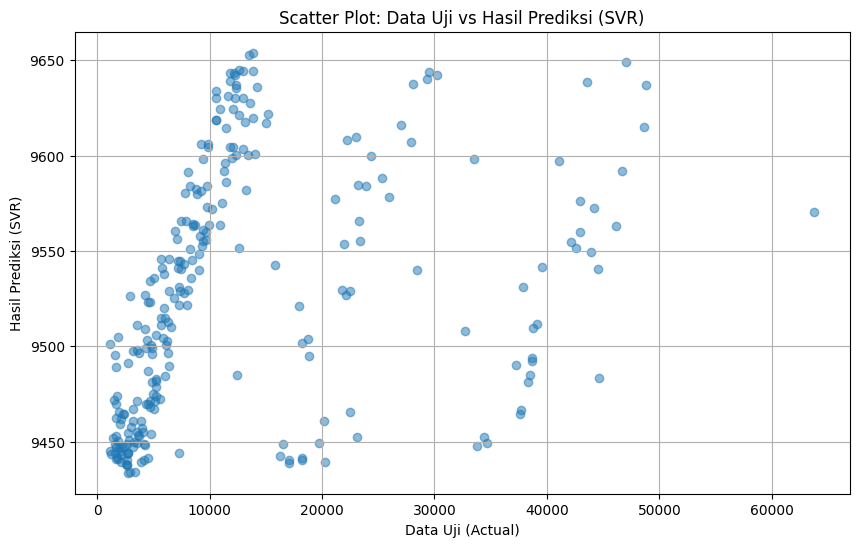

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVR dengan kernel RBF
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Melatih model SVR pada data latih
svr_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred_svr = svr_model.predict(X_test_scaled)

# Menghitung R-squared
r_squared_svr = r2_score(y_test, y_pred_svr)

# Menghitung MSE
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Menghitung MAE
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Menampilkan hasil evaluasi
print("R-squared (SVR):", r_squared_svr)
print("MSE (SVR):", mse_svr)
print("MAE (SVR):", mae_svr)

# Scatter plot data uji vs hasil prediksi SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Scatter Plot: Data Uji vs Hasil Prediksi (SVR)')
plt.xlabel('Data Uji (Actual)')
plt.ylabel('Hasil Prediksi (SVR)')
plt.grid(True)
plt.show()